In [1]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 2690 (delta 0), reused 2 (delta 0), pack-reused 2686
Receiving objects: 100% (2690/2690), 5.43 MiB | 790.00 KiB/s, done.
Resolving deltas: 100% (1780/1780), done.


In [2]:
!pip install -qr yolov5/requirements.txt

You should consider upgrading via the '/home/herman/Env/pro/bin/python -m pip install --upgrade pip' command.


In [3]:
%cd yolov5

/home/herman/Desktop/arepo/alluneed/pytorch/yolov5


In [4]:
import torch
from IPython.display import Image, clear_output  # to display images
from utils.google_utils import gdrive_download  # to download models/datasets


In [5]:

clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.6.0 CPU


Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', img_size=416, iou_thres=0.45, output='inference/output', save_conf=False, save_txt=False, source='inference/images/', update=False, view_img=False, weights=['yolov5s.pt'])
Using CPU

100%|██████████████████████████████████████| 14.5M/14.5M [00:13<00:00, 1.13MB/s]

Fusing layers... 
Model Summary: 140 layers, 7.45958e+06 parameters, 0 gradients
image 1/2 /home/herman/Desktop/arepo/alluneed/pytorch/yolov5/inference/images/bus.jpg: 416x320 3 persons, 1 buss, Done. (0.075s)
image 2/2 /home/herman/Desktop/arepo/alluneed/pytorch/yolov5/inference/images/zidane.jpg: 256x416 2 persons, 1 ties, Done. (0.067s)
Results saved to inference/output
Done. (0.231s)


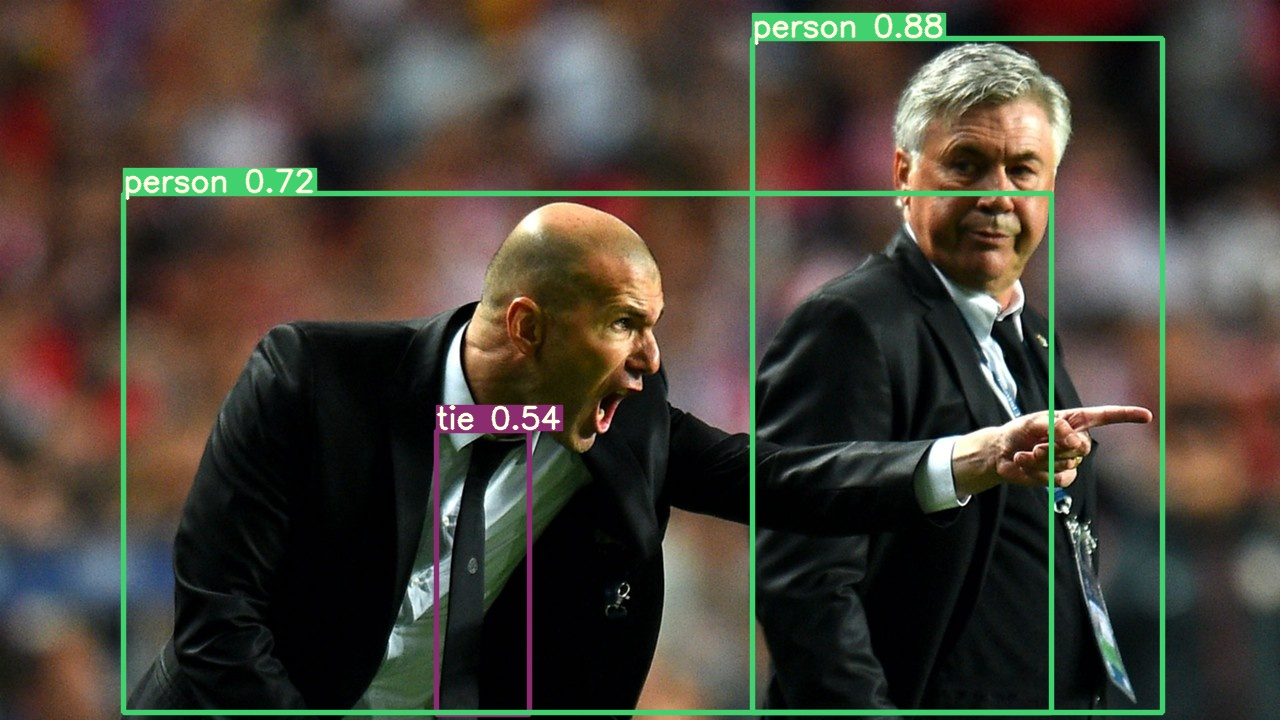

In [6]:
!python detect.py --weights yolov5s.pt --img 416 --conf 0.4 --source inference/images/
Image(filename='inference/output/zidane.jpg', width=600)

In [7]:
gdrive_download('1Y6Kou6kEB0ZEMCCpJSKStCor4KAReE43','coco2017val.zip')  # val2017 dataset
!mv ./coco ../  # move folder alongside /yolov5

In [8]:
!python test.py --weights yolov5x.pt --data coco.yaml --img 672

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='./data/coco.yaml', device='', img_size=672, iou_thres=0.65, save_json=True, save_txt=False, single_cls=False, task='val', verbose=False, weights=['yolov5x.pt'])
Using CPU

100%|████████████████████████████████████████| 170M/170M [00:40<00:00, 4.39MB/s]

Fusing layers... 
Model Summary: 284 layers, 8.89222e+07 parameters, 0 gradients
Scanning labels ../coco/labels/val2017.cache (4952 found, 0 missing, 48 empty, 0 duplicate, for 5000 images): 5000it [00:00, 17986.13it/s]
               Class      Images     Targets           P           R      mAP@.5
                 all       5e+03    3.63e+04       0.421       0.757       0.672       0.478
Speed: 646.6/2.3/648.8 ms inference/NMS/total per 672x672 image at batch-size 32

COCO mAP with pycocotools... saving detections_val2017__results.json...
ERROR: pycocotools unable to run: No module named 'pycocotools'


In [10]:
!pip install pycocotools


  Created wheel for pycocotools: filename=pycocotools-2.0.2-cp38-cp38-linux_x86_64.whl size=418149 sha256=94c197ffc61c08fb785c3d35c46e0c50e9c957d4da9bd100dceac5e3d7520a55
  Stored in directory: /home/herman/.cache/pip/wheels/e7/77/b2/6f38b5bea571cd8f4689f91a7c1ed2eaecb2c2ce17f9945b17
Successfully built pycocotools
You should consider upgrading via the '/home/herman/Env/pro/bin/python -m pip install --upgrade pip' command.


In [11]:
gdrive_download('1n_oKgR81BJtqk75b00eAjdv03qVCQn2f','coco128.zip')  # coco128 dataset
!mv ./coco128 ../  # move folder alongside /yolov5

In [12]:
# Start tensorboard (optional)
%load_ext tensorboard
%tensorboard --logdir runs

In [13]:
# Train YOLOv5s on coco128 for 3 epochs
!python train.py --img 640 --batch 16 --epochs 3 --data coco128.yaml --cfg yolov5s.yaml --weights yolov5s.pt --nosave --cache

Using CPU

Namespace(adam=False, batch_size=16, bucket='', cache_images=True, cfg='./models/yolov5s.yaml', data='./data/coco128.yaml', device='', epochs=3, evolve=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[640, 640], local_rank=-1, logdir='runs/', multi_scale=False, name='', noautoanchor=False, nosave=True, notest=False, rect=False, resume=False, single_cls=False, sync_bn=False, total_batch_size=16, weights='yolov5s.pt', workers=8, world_size=1)
Start Tensorboard with "tensorboard --logdir runs/", view at http://localhost:6006/
2020-10-21 11:21:38.519373: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory
2020-10-21 11:21:38.519422: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Hyperparameters {'lr0': 0.01, 'lrf': 0

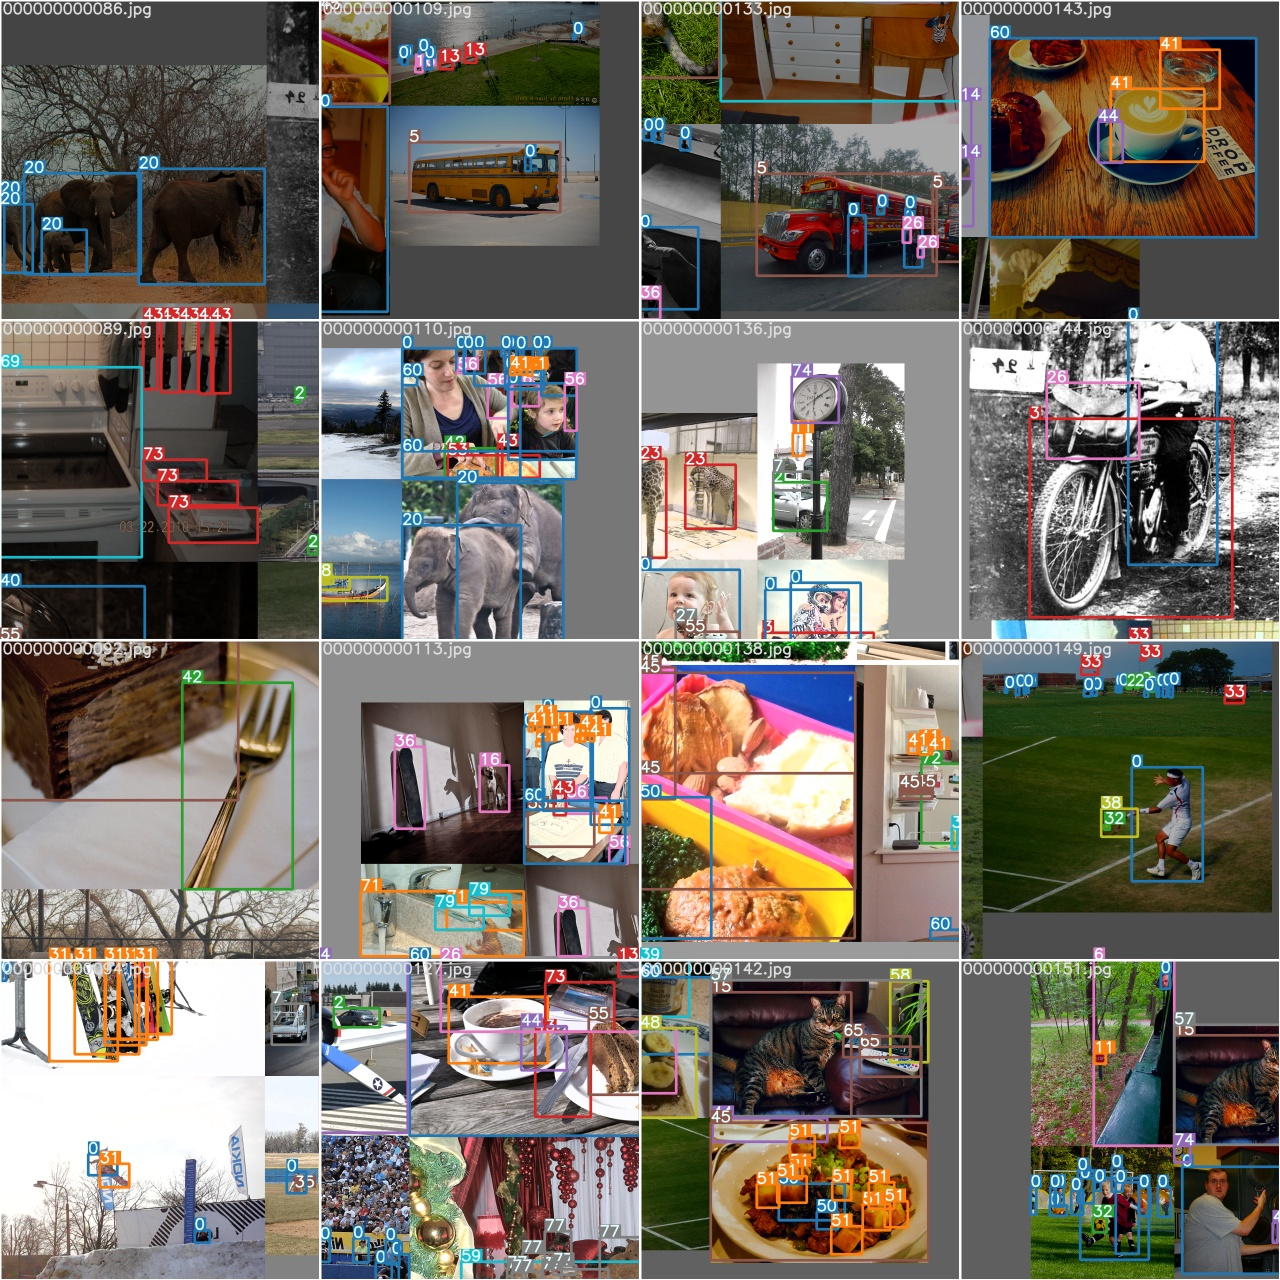

In [14]:
Image(filename='runs/exp0/train_batch1.jpg', width=900) 

No handles with labels found to put in legend.


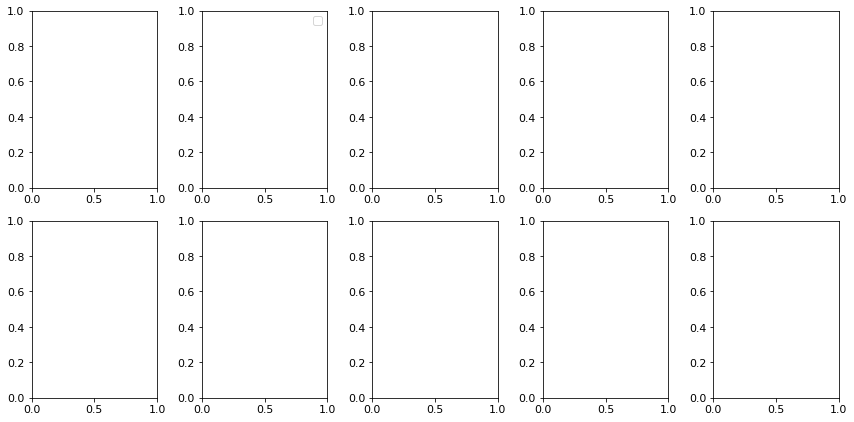

In [15]:
from utils.general import plot_results; plot_results() 

In [16]:
# Train YOLOv5s on coco128 for 3 epochs
!python train.py --img 640 --batch 16 --epochs 50 --data coco128.yaml --cfg yolov5s.yaml --weights yolov5s.pt --nosave --cache

Using CPU

Namespace(adam=False, batch_size=16, bucket='', cache_images=True, cfg='./models/yolov5s.yaml', data='./data/coco128.yaml', device='', epochs=50, evolve=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[640, 640], local_rank=-1, logdir='runs/', multi_scale=False, name='', noautoanchor=False, nosave=True, notest=False, rect=False, resume=False, single_cls=False, sync_bn=False, total_batch_size=16, weights='yolov5s.pt', workers=8, world_size=1)
Start Tensorboard with "tensorboard --logdir runs/", view at http://localhost:6006/
2020-10-21 11:26:48.930503: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory
2020-10-21 11:26:48.930549: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Hyperparameters {'lr0': 0.01, 'lrf': 

      9/49        0G   0.04089    0.0605   0.01356     0.115       227       640
               Class      Images     Targets           P           R      mAP@.5
                 all         128         929       0.396       0.798       0.735       0.484

     Epoch   gpu_mem       box       obj       cls     total   targets  img_size
     10/49        0G     0.043   0.06914   0.01517    0.1273       185       640
               Class      Images     Targets           P           R      mAP@.5
                 all         128         929       0.391       0.795       0.747       0.488

     Epoch   gpu_mem       box       obj       cls     total   targets  img_size
     11/49        0G    0.0419   0.05805   0.01518    0.1151       190       640
               Class      Images     Targets           P           R      mAP@.5
                 all         128         929         0.4       0.796       0.749       0.492

     Epoch   gpu_mem       box       obj       cls     total   targets

               Class      Images     Targets           P           R      mAP@.5
                 all         128         929       0.476       0.869       0.842       0.586

     Epoch   gpu_mem       box       obj       cls     total   targets  img_size
     34/49        0G   0.03739    0.0499   0.01067   0.09796       168       640
               Class      Images     Targets           P           R      mAP@.5
                 all         128         929       0.488       0.877       0.847       0.588

     Epoch   gpu_mem       box       obj       cls     total   targets  img_size
     35/49        0G   0.03742   0.05107   0.01057   0.09906       149       640
               Class      Images     Targets           P           R      mAP@.5
                 all         128         929       0.485       0.874       0.845       0.588

     Epoch   gpu_mem       box       obj       cls     total   targets  img_size
     36/49        0G   0.03804   0.04848  0.009095   0.09561       225